# Visual Computing in the Life Sciences
## Assignment Sheet 3
### Camila Duitama, Mauricio Lacerda

#### Exercise 1 (Dimensionality Reduction, 25 Points)

It is difficult to visualize high-dimensional spaces. In the previous assignment, we therefore focused on
the PCA method for dimensionality reduction. This week, we will try out more advanced dimensionality
reduction methods, compare them, and demonstrate how their hyper parameters affect their results.

a) To answer the questions in this exercise, please use the interactive visualization for t-SNE in the
following link: https://distill.pub/2016/misread-tsne/


- Pick the "three clusters with equal numbers of points" data set. Set the number of points per
class to 10, and number of dimensions to 50. Once run the demo with perplexity=29, and
once with perplexity=30. Explain why there is a big difference in the final 2D embedding?
(3P)


Perplexity is a tuneable parameter that tells you how to balance attention between local and global aspects of your data, and there is not one perplexity value that is valid or useful for every visualization. Therefore the separation between clusters varies according to this feature, and a minimal change in perplexity fives two completely different results: The clear separation between three clusters, and the unclear distinction between the three clusters.



- Try the example "a square grid with equal spacing between points", with 20 points per side.
In the resulting plot with perplexity=100, why are distances between points in the middle of
the square larger than near the boundary? (3P)

T-SNE algorithm tends to expand denser regions of data. Since the middles of the clusters have less empty space around them than the ends, the algorithm magnifies the distance between the points in the middle compared to the points near the boundary.

- Pick "a square grid with equal spacing between points" data set, with 20 points per side,
and perplexity=2. Run the t-SNE multiple times. You will observe that the square grid
sometimes breaks down into separate smaller clusters. Why? (3P)

With perplexity values below 5 local variations dominate, that is, low values of perplexity like the one we are using, often leads to the kind of distribution where you can see non-statistically significant clumps on the visualization.

- Use different perplexities for "points randomly distributed in a circle"with 100 points. Around
what perplexity value does the resulting visualization start to resemble the input data set?
Explain why the perplexity has to be large enough for the result to look like the input. (3P)

In [ ]:
With a perplexity value around the resulting visualization starts to resemble the input data set.

b) In this task we will work with a Mice Protein Expression Dataset (Data_Cortex_Nuclear.xls),
which contains expression levels of 77 proteins, measured in the cerebral cortex of 8 classes of
mice. The classes result from two genotypes (Ts65Dn, which serves as a mouse model of human
down syndrome, vs. normal controls), two treatments (injection of the drug memantine vs. a
saline solution as a control), and two experimental conditions related to context fear conditioning
(context-shock, which should lead to learning, vs. shock-context, in which no learning takes place).
Counting all repeated measurements, there are 1080 instances overall, some with missing data.
You can find more information on the data in the corresponding scientific publication.


- Write a program to read the above data set. Interpolate missing values in a reasonable way.
(1P)

In [4]:
data=pd.read_excel('Data_Cortex_Nuclear.xls')
data=data.interpolate()

- Only for the mice from c-SC-s and t-SC-s classes, use PCA to reduce the 77 dimensional data
set into two dimensions. Visualize the 2D data set in a scatter plot using dierent colors for
instances from each class. (2P)

- Produce a corresponding plot with ISOMAP, setting the neighborhood attribute to 10 for
dimensionality reduction. Save the resulting 2D visualization. (2P)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib 
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)


In [ ]:
data.as_matrix(columns=None)

In [ ]:
data.head()

- Compare the visualization from ISOMAP to the one from PCA. Which method would you
choose for this particular data set to visualize it in 2D? (1P)

c) Write a program to read the breast-cancer-wisconsin.xlsx file again. Interpolate missing
values as before, and keep all variables. Use t-SNE for dimensionality reduction. Run t-SNE
with a random initial distribution of points and different perplexities, i.e., 5, 10, 20, 30, 40, and 50. Visualize the 2D data set in a scatter plot using different colors for cases from benign and
malignant classes. Store your visualizations. (2P) 


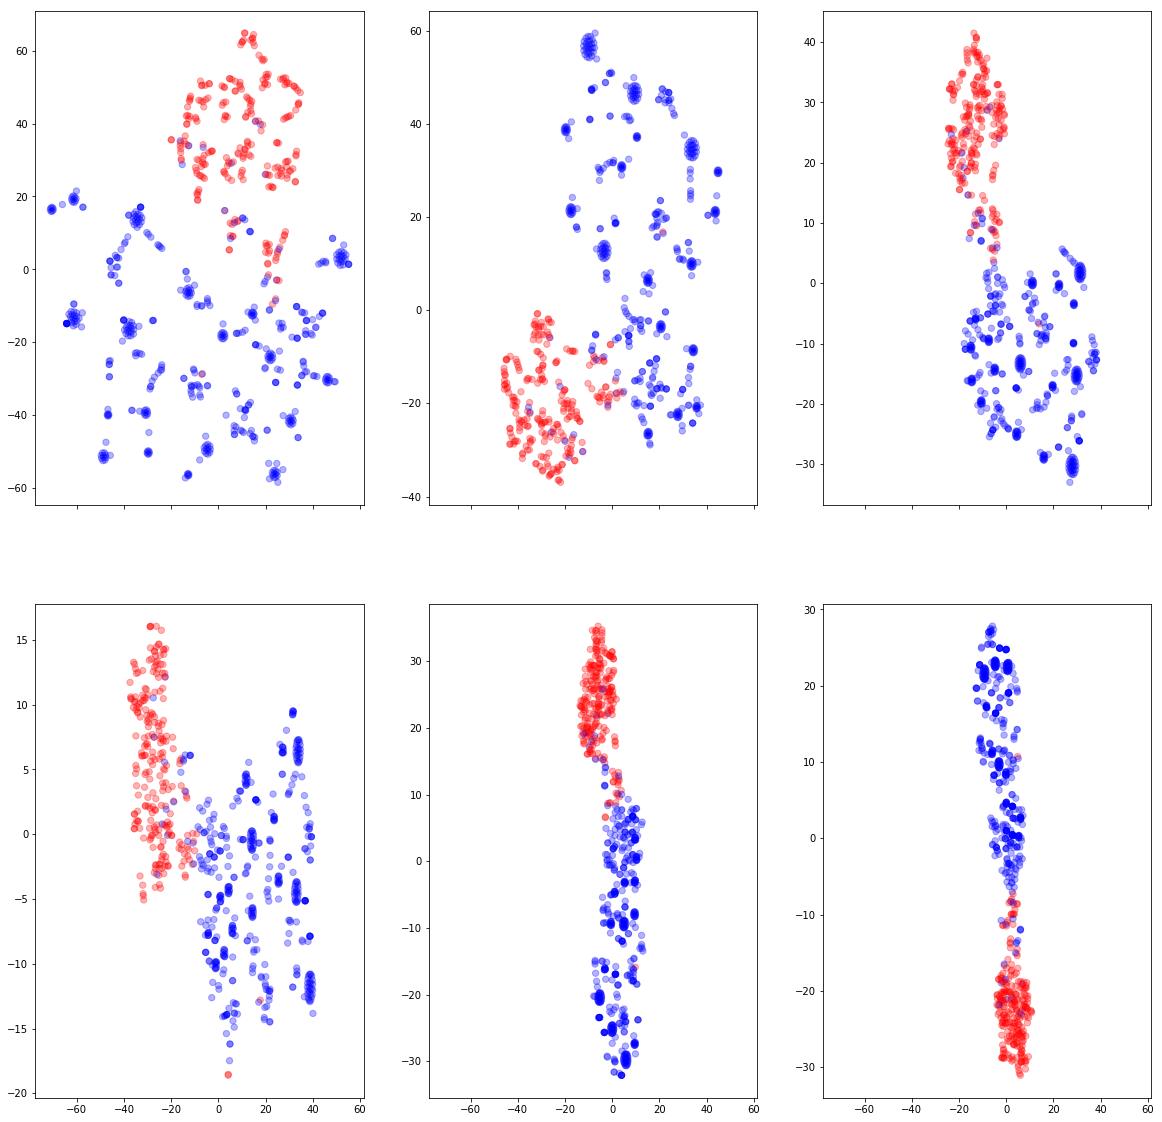

In [14]:
data=pd.read_excel('breast-cancer-wisconsin.xlsx')
data=data.interpolate()
perplexity=[5,10,20,30,40,50]
result=dict()
fig,axes=plt.subplots(2,3,sharex=True, figsize=(20,20))

c=[0,0,'#0000FF', 0, '#FF0000']
color=[c[x] for x in data['class']]

for each in perplexity:
    name='X_TSNE_random_'+str(each)
    result[name]=manifold.TSNE(perplexity=each, n_components=2).fit_transform(data.iloc[:,1:10])
 

axes[0,0].scatter(result['X_TSNE_random_5'][:,0],result['X_TSNE_random_5'][:,1], alpha=0.3, color=color, s=40)
axes[0,1].scatter(result['X_TSNE_random_10'][:,0],result['X_TSNE_random_10'][:,1], alpha=0.3, color=color, s=40)
axes[0,2].scatter(result['X_TSNE_random_20'][:,0],result['X_TSNE_random_20'][:,1], alpha=0.3, color=color, s=40)
axes[1,0].scatter(result['X_TSNE_random_30'][:,0],result['X_TSNE_random_30'][:,1], alpha=0.3, color=color, s=40)
axes[1,1].scatter(result['X_TSNE_random_40'][:,0],result['X_TSNE_random_40'][:,1], alpha=0.3, color=color, s=40)
axes[1,2].scatter(result['X_TSNE_random_50'][:,0],result['X_TSNE_random_50'][:,1], alpha=0.3, color=color, s=40)

plt.show()

- Repeat this experiment, except this time use PCA to create the initial distribution of points. Note that the implementation in scikit-learn allows you to select the initialization using a keyword parameter. (2P)


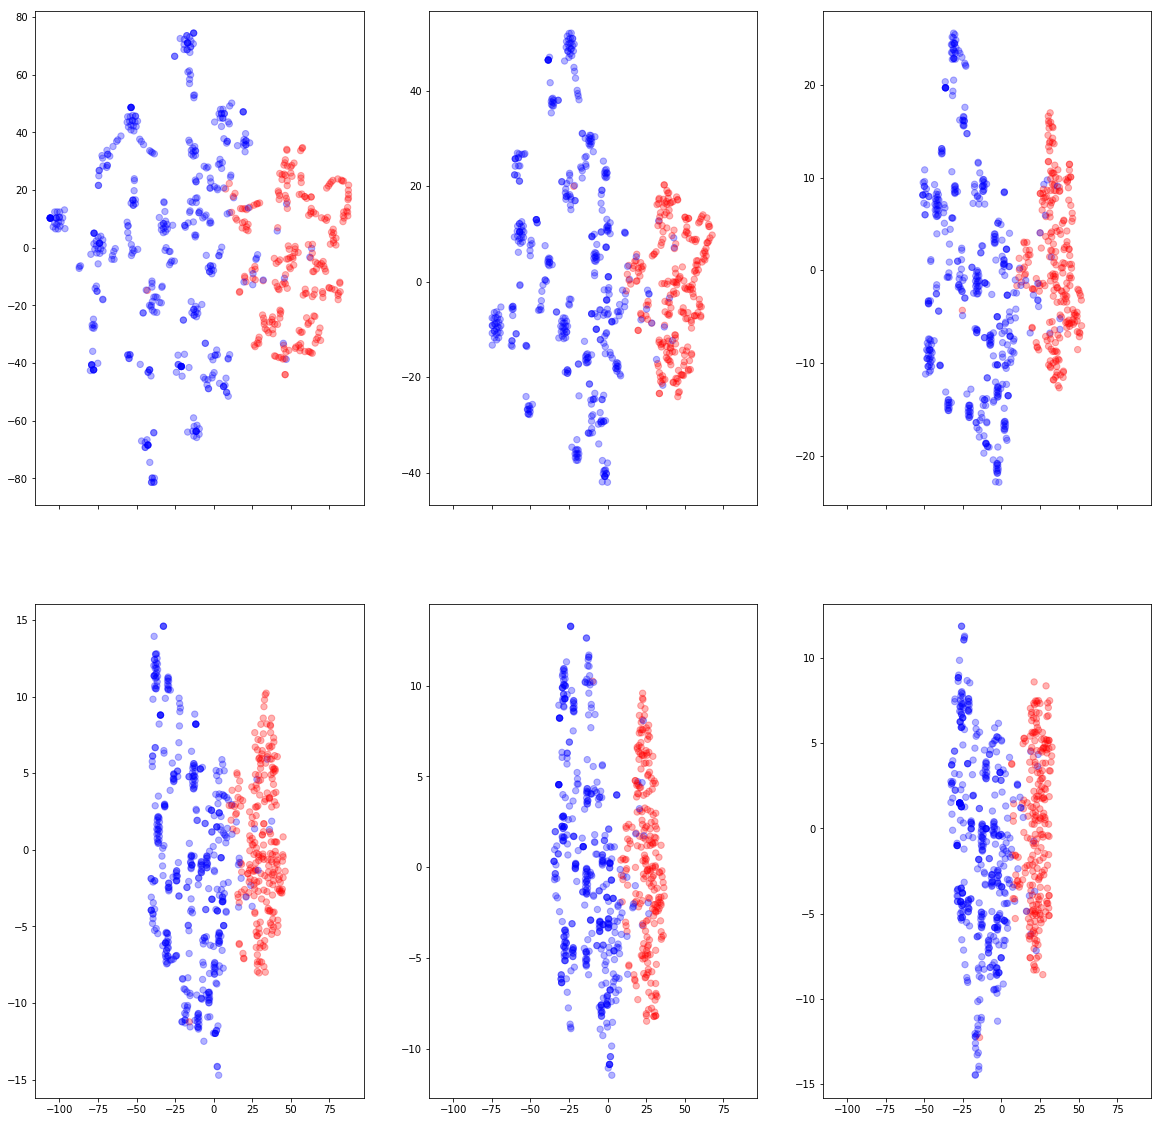

In [16]:
fig,axes=plt.subplots(2,3,sharex=True, figsize=(20,20))

for each in perplexity:
    name='X_TSNE_PCA_'+str(each)
    result[name]=manifold.TSNE(perplexity=each, n_components=2, init= 'pca').fit_transform(data.iloc[:,1:10])


axes[0,0].scatter(result['X_TSNE_PCA_5'][:,0],result['X_TSNE_PCA_5'][:,1], alpha=0.3, color=color, s=40)
axes[0,1].scatter(result['X_TSNE_PCA_10'][:,0],result['X_TSNE_PCA_10'][:,1], alpha=0.3, color=color, s=40)
axes[0,2].scatter(result['X_TSNE_PCA_20'][:,0],result['X_TSNE_PCA_20'][:,1], alpha=0.3, color=color, s=40)
axes[1,0].scatter(result['X_TSNE_PCA_30'][:,0],result['X_TSNE_PCA_30'][:,1], alpha=0.3, color=color, s=40)
axes[1,1].scatter(result['X_TSNE_PCA_40'][:,0],result['X_TSNE_PCA_40'][:,1], alpha=0.3, color=color, s=40)
axes[1,2].scatter(result['X_TSNE_PCA_50'][:,0],result['X_TSNE_PCA_50'][:,1], alpha=0.3, color=color, s=40)

plt.show()

In [ ]:
result['X_TSNE_10']

- Compare the diagrams from random initialization to the ones with PCA initialization. For which perplexity values did the 2D embeddings fail to nicely separate the two data clusters? Why? (3P)


#### Exercise 2 (Graph Visualization, 25 Points)


In this exercise you will learn how to use the graph visualization package Graphviz via its Python
bindings.

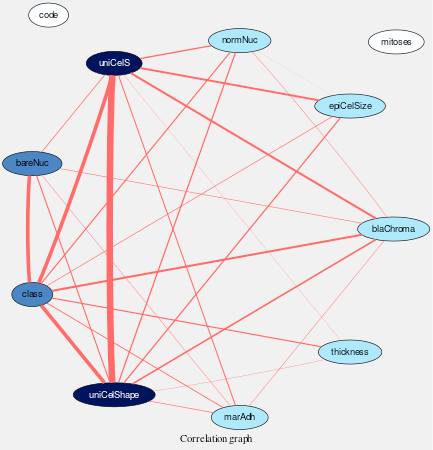

a) Using the same dataset as in assignment sheet 2, write code to fill in the missing values. Then
compute the Pearson correlation between any pair of variables, and store them in a matrix. (5P)

b) Install the Graphviz library and its Python interface. Generate and visualize some simple graph.
You can find the software and its documentation at https://pypi.python.org/pypi/graphviz.
(5P)

c) Create a graph from the correlation matrix and visualize it. Represent each variable as a node in
the graph. Insert an edge between two variables whenever the Pearson correlation between them
exceeds the threshold rho > 0:6. (4P)

d) Modify the visual attributes of edges to reflect the magnitude of the correlation. (3P)

e) Produce an alternative visualization with a circular layout. Color the nodes so that there are four
set of nodes, one color for having at least one correlation more than 0:9 to other nodes, another for
having at least a correlation 0:8 < rho max <= 0:9, one for having a correlation 0:6 < rho max <= 0:8
and the last for the remaining nodes. (5P)

f) Answer the following questions:

- At the selected threshold, which nodes are disconnected from the rest of the graph and what
do they indicate? (1P)

- If two nodes A and B are strongly correlated, and node C is strongly correlated with node
B, can we conclude that node C will be also strongly correlated with node A? (1P)

- Where have you already seen the four nodes connected to node "class" through its thickest
edges? (1P)